# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch

In [2]:
device = torch.device('cuda:1')

In [3]:
dataset = DataLoader(data_dir="../../DDICorpus/DDICorpus/", device=device)

In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d436.s0,1,0,1,val
1,DDI-DrugBank.d436.s0,2,3,6,val
2,DDI-DrugBank.d436.s0,3,8,18,val
3,DDI-DrugBank.d436.s0,4,20,29,val
4,DDI-DrugBank.d436.s0,5,31,34,val


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d519.s0,1,45,52
1,DDI-DrugBank.d519.s1,1,66,73
2,DDI-DrugBank.d519.s2,1,0,7
3,DDI-DrugBank.d519.s3,1,29,36
4,DDI-DrugBank.d519.s3,2,83,94


In [6]:
dataset.vocab[:15]

['No',
 'drug',
 'nutritional',
 'supplement',
 'food',
 'or',
 'herb',
 'interactions',
 'have',
 'yet',
 'been',
 'reported',
 'formal',
 'drug/drug',
 'interaction']

In [7]:
dataset.id2ner

{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}

In [8]:
dataset.max_sample_length

101

In [9]:
dataset.get_random_sample()

/home/guspfame@GU.GU.SE/ML/A1/lt2316-h20-aa/aa/data_loading.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'There was no change after a single dose of DRUG:PGF2alpha'

### Data Exploration

[Counter({2: 2830, 3: 546, 1: 505, 4: 161}), Counter({2: 1124, 3: 239, 1: 214, 4: 50}), Counter({2: 909, 1: 236, 3: 191, 4: 80})]
{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}


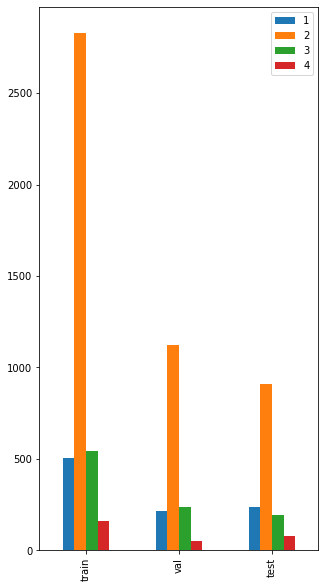

In [17]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                         data=dataset.data_df,
                                                         max_sample_length=dataset.max_sample_length,
                                                         id2word=dataset.id2word,
                                                         device=device
                                                         ))

## Bonus Part: Explore Some more

In [13]:
#uncomment the code below if you want to do bonus part

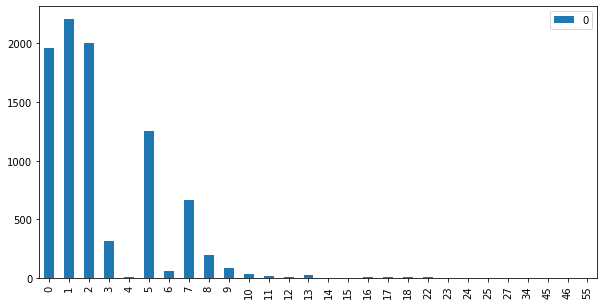

In [14]:
dataset.plot_ner_per_sample_distribution()

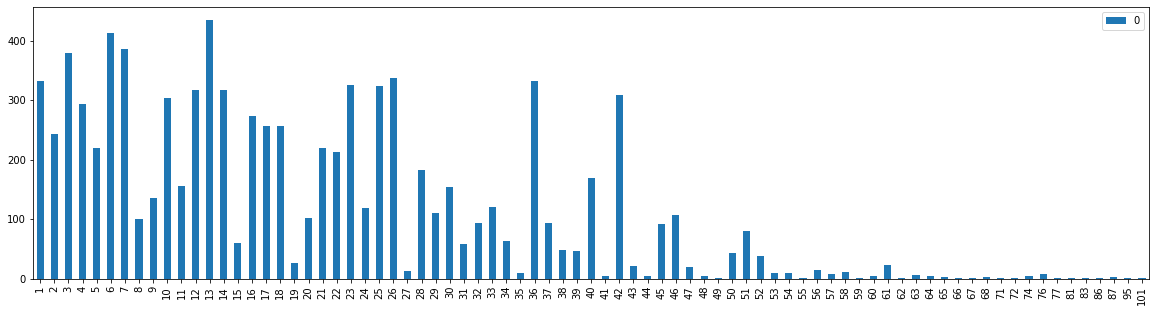

In [15]:
dataset.plot_sample_length_distribution()

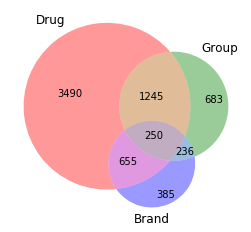

In [16]:
dataset.plot_ner_cooccurence_venndiagram()